<a href="https://colab.research.google.com/github/navgaur/SP-ML-PT-2024/blob/main/Distributions_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Some distributions**

Students involved : Harshit, Radhika, Swayam

Mentor : Naveen

(names in alphabatical order)

Institution : Dyal Singh College (June - July 2024)

---

# Importing All the necessary libraries for plotting graphs





In [ ]:
from google.colab import drive
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.io as pio
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Mounting of data file for N.Gaur
drive.mount('/content/drive')

path='/content/drive/MyDrive/Student Projects/2024/pT_ML/dielectron.csv'

df = pd.read_csv(path)
#print(df)


Mounted at /content/drive


In [ ]:

#path="/content/dielectron.csv"
#df=pd.read_csv(path)
#print(df)

          Run      Event        E1        px1        py1       pz1       pt1  \
0      147115  366639895  58.71410  -7.311320  10.531000 -57.29740  12.82020   
1      147115  366704169   6.61188  -4.152130  -0.579855  -5.11278   4.19242   
2      147115  367112316  25.54190 -11.480900   2.041680  22.72460  11.66100   
3      147115  366952149  65.39590   7.512140  11.887100  63.86620  14.06190   
4      147115  366523212  61.45040   2.952840 -14.622700 -59.61210  14.91790   
...       ...        ...       ...        ...        ...       ...       ...   
99995  146511  522575834  12.31310 -10.658000   5.164440   3.36858  11.84330   
99996  146511  522786431  18.46420   7.854990  15.133000  -7.08659  17.05020   
99997  146511  522906124   4.18566  -3.273500  -0.308507  -2.59013   3.28801   
99998  146511  523243830  54.46220  11.352600  11.880900  51.92400  16.43280   
99999  146511  524172389   7.64000   0.886162   5.478900  -5.25033   5.55010   

           eta1      phi1  Q1        E2

In [ ]:
df=pd.read_csv('dielectron.csv')  # will work for swayam, harshit

In [ ]:
''' will only work for radhika '''

# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Reading the csv file
file_path = '/content/drive/My Drive/dielectron.csv'
df = pd.read_csv(file_path)

# Proportion of Electrons and Positrons

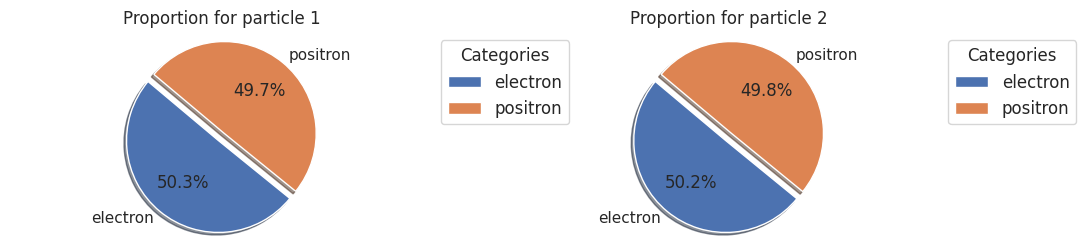

In [ ]:

#df=pd.read_csv('dielectron.csv')
#Group by charge
sns.set_style('darkgrid')
sns.set_theme(style="white")
proportion_for_particle1=df.groupby('Q1')['Q1'].value_counts()
proportion_for_particle2=df.groupby('Q2')['Q2'].value_counts()

# count_particle1
count_for_electron_par1 = proportion_for_particle1.get(-1, 0)
count_for_positron_par1 = proportion_for_particle1.get(1, 0)

# count_particle2
count_for_electron_par2 = proportion_for_particle2.get(-1, 0)
count_for_positron_par2 = proportion_for_particle2.get(1, 0)

#fig_size
plt.figure(figsize=(12,6))

#particle_1_subplot
plt.subplot(2,2,1)
sizes=[count_for_electron_par1,count_for_positron_par1]
explode=[0,0.1]
labels=['electron','positron']
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Proportion for particle 1')
plt.legend(title="Categories", loc="upper left", fontsize='medium', bbox_to_anchor=(1, 0, 0.5, 1))

#particle_2_subplot
plt.subplot(2,2,2)
sizes=[count_for_electron_par2,count_for_positron_par2]
explode=[0,0.1]
labels=['electron','positron']
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Proportion for particle 2')
plt.legend(title="Categories", loc="upper left", fontsize='medium', bbox_to_anchor=(1, 0, 0.5, 1))


plt.show()


# The Energy Distribution


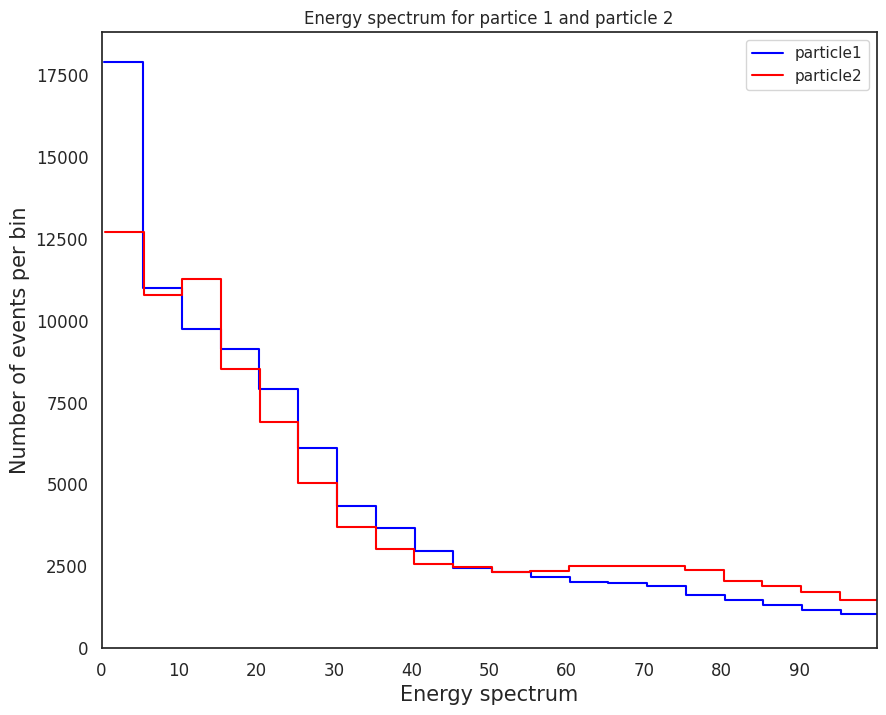

In [ ]:
final_quantile_p1=df['E1'].quantile(0.9)

#binsize
bins_manual=100  # manual bin selection
bins1=np.histogram_bin_edges(df['E1'], bins='fd')   # numpy auto bin selection
lower_lt_x=0  # lower limit for x axis
#upper_lt_x=final_quantile_p1  # upper limit for x axis
upper_lt_x=100
scale=10  # scale for x axis

#fig_size
plt.figure(figsize=(10,8))
# defining bins
bins_auto=np.histogram_bin_edges(df['E1'], bins='fd')   # numpy auto bin selection
bin_width_array=np.diff(bins_auto)
bin_width=bin_width_array[0]  # width of a bin
#defining parameters
#ax1 = sns.histplot(x='E1', data=df, binwidth=bin_width, color='blue', alpha=1, element='step', fill=False, label='particle1')
#ax2 = sns.histplot(x='E2', data=df, binwidth=bin_width, color='red', alpha=1, element='step', fill=False,label='particle2')

ax1 = sns.histplot(x='E1', data=df, binwidth=5, color='blue', alpha=1, element='step', fill=False, label='particle1')
ax2 = sns.histplot(x='E2', data=df, binwidth=5, color='red', alpha=1, element='step', fill=False,label='particle2')


plt.title('Energy spectrum for partice 1 and particle 2')

#set range for x axis
plt.xlim(lower_lt_x,upper_lt_x)

# setting scale for the x axis
plt.xticks(np.arange(lower_lt_x,upper_lt_x,scale),fontsize=12)
plt.yticks(fontsize=12)

plt.legend()
plt.xlabel('Energy spectrum', fontsize=15)
plt.ylabel('Number of events per bin', fontsize=15)

#plot
plt.show()


# Transverse momentum and its componnents

## Configuring the columns

In [ ]:
low_x_lim=-40
upp_x_lim=40

'''Particle 1 configutaion'''
# configuration for px1
df_below_zero_px1=df[df['px1']<0]
below_zero_quantile_px1=df_below_zero_px1['px1'].quantile(0.01)
final_quantile_px1=df['px1'].quantile(0.99)


# configuration for py1
df_below_zero_py1=df[df['py1']<0]
below_zero_quantile_py1=df_below_zero_py1['py1'].quantile(0.01)
final_quantile_py1=df['py1'].quantile(0.99)


# configuration for pt1

final_quantile_pt1=df['pt1'].quantile(0.99)


'''Particle 2 configuration'''

# configuration for px2
df_below_zero_px2=df[df['px2']<0]
below_zero_quantile_px2=df_below_zero_px2['px2'].quantile(0.01)
final_quantile_px2=df['px2'].quantile(0.99)


# configuration for py2
df_below_zero_py2=df[df['py2']<0]
below_zero_quantile_py2=df_below_zero_py2['py2'].quantile(0.01)
final_quantile_py2=df['py2'].quantile(0.99)


# configuration for pt2

final_quantile_pt2=df['pt2'].quantile(0.99)


df['pt1_calculated']=np.sqrt(np.square(df['px1'])+np.square(df['py1']))
df['pt2_calculated']=np.sqrt(np.square(df['px2'])+np.square(df['py2']))


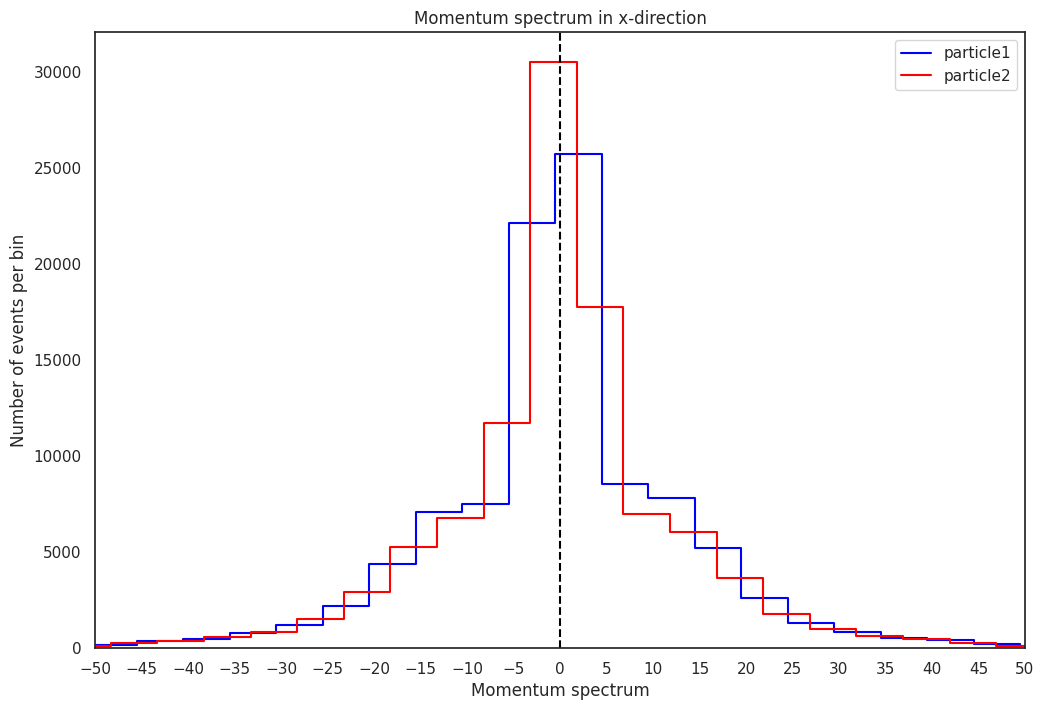

In [ ]:
fig = plt.figure(figsize=(12, 8))


# plotting  momentum of x-axis

plt.xlim(-40,40)
bins_manual=200  # manual bin selection
bins_auto=np.histogram_bin_edges(df['px1'], bins='fd')   # numpy auto bin selection
bin_width_array=np.diff(bins_auto)
bin_width=bin_width_array[0]  # width of a bin
#sns.histplot(x='px1', data=df,color='blue',binwidth=bin_width ,alpha=1, element='step', fill=False,label='particle1')
#sns.histplot(x='px2', data=df,color='red', alpha=1, binwidth=bin_width,element='step', fill=False,label='particle2')
sns.histplot(x='px1', data=df,color='blue',binwidth=5 ,alpha=1, element='step', fill=False,label='particle1')
sns.histplot(x='px2', data=df,color='red', alpha=1, binwidth=5 ,element='step', fill=False,label='particle2')
plt.title('Momentum spectrum in x-direction')
#plt.xlim(below_zero_quantile_px1,final_quantile_px1)  # setting x axis limits


#plt.xticks(np.arange(below_zero_quantile_px1,final_quantile_px1,5)) # setting scale of x-axis
plt.xticks(range(-50,51,5)) # setting lower and upper limits of x axis


plt.xlabel("Momentum spectrum")
plt.ylabel('Number of events per bin')
plt.axvline(x=0, color='black', linestyle='--')


plt.legend()


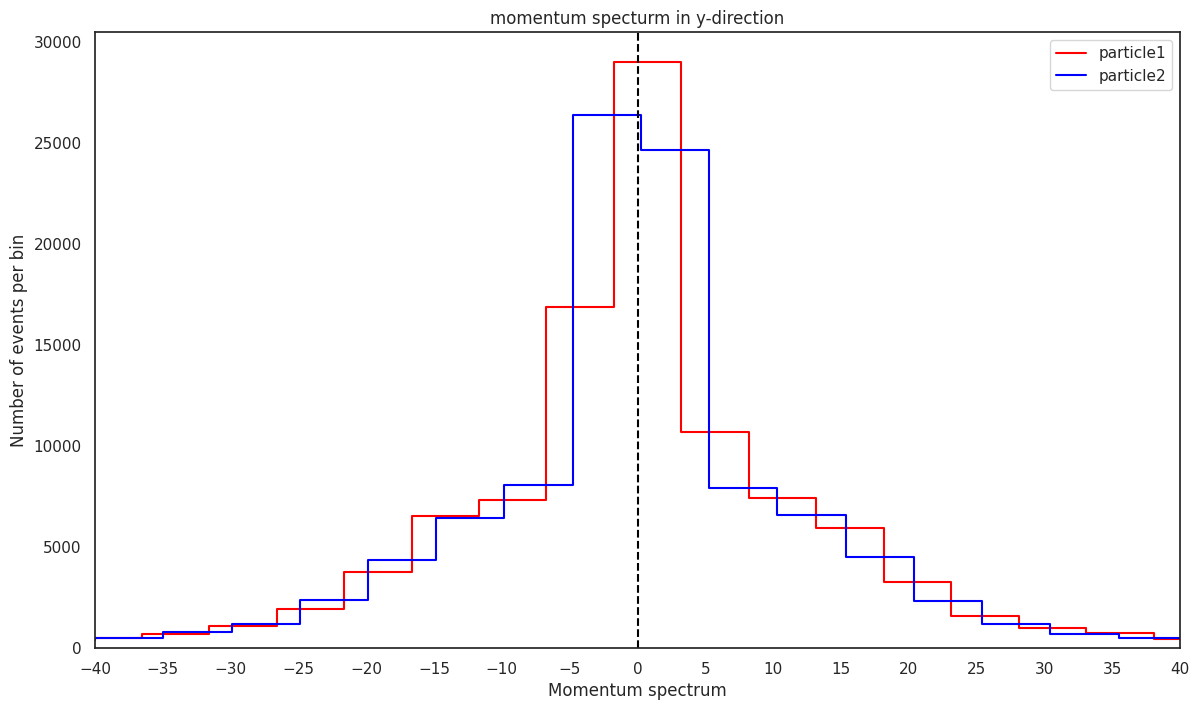

In [ ]:
# Second subplot (top right)
plt.figure(figsize=(14,8))
bins_manual=250  # manual bins
bins=np.histogram_bin_edges(df['py1'], bins='fd')   # numpy auto bins
bin_width_array=np.diff(bins)
bin_width=bin_width_array[0]  # width of a bin
#sns.histplot(x='py1', data=df, binwidth=bin_width,color='red', alpha=1, element='step', fill=False,label='particle1')
#sns.histplot(x='py2', data=df, binwidth=bin_width,color='blue', alpha=1, element='step', fill=False,label='particle2')

sns.histplot(x='py1', data=df, binwidth=5,color='red', alpha=1, element='step', fill=False,label='particle1')
sns.histplot(x='py2', data=df, binwidth=5,color='blue', alpha=1, element='step', fill=False,label='particle2')

plt.title('momentum specturm in y-direction')
#plt.xlim(below_zero_quantile_py1,final_quantile_py1)  # setting lower and upper limits of x axis
#plt.xticks(np.arange(below_zero_quantile_py1,final_quantile_py1,5)) # setting scale of x-axis
plt.xlim(-40,40)
plt.xticks(range(-40,41,5))

plt.xlabel("Momentum spectrum")
plt.ylabel('Number of events per bin')
plt.axvline(x=0, color='black', linestyle='--')

plt.legend()



# Momentum in transverse direction

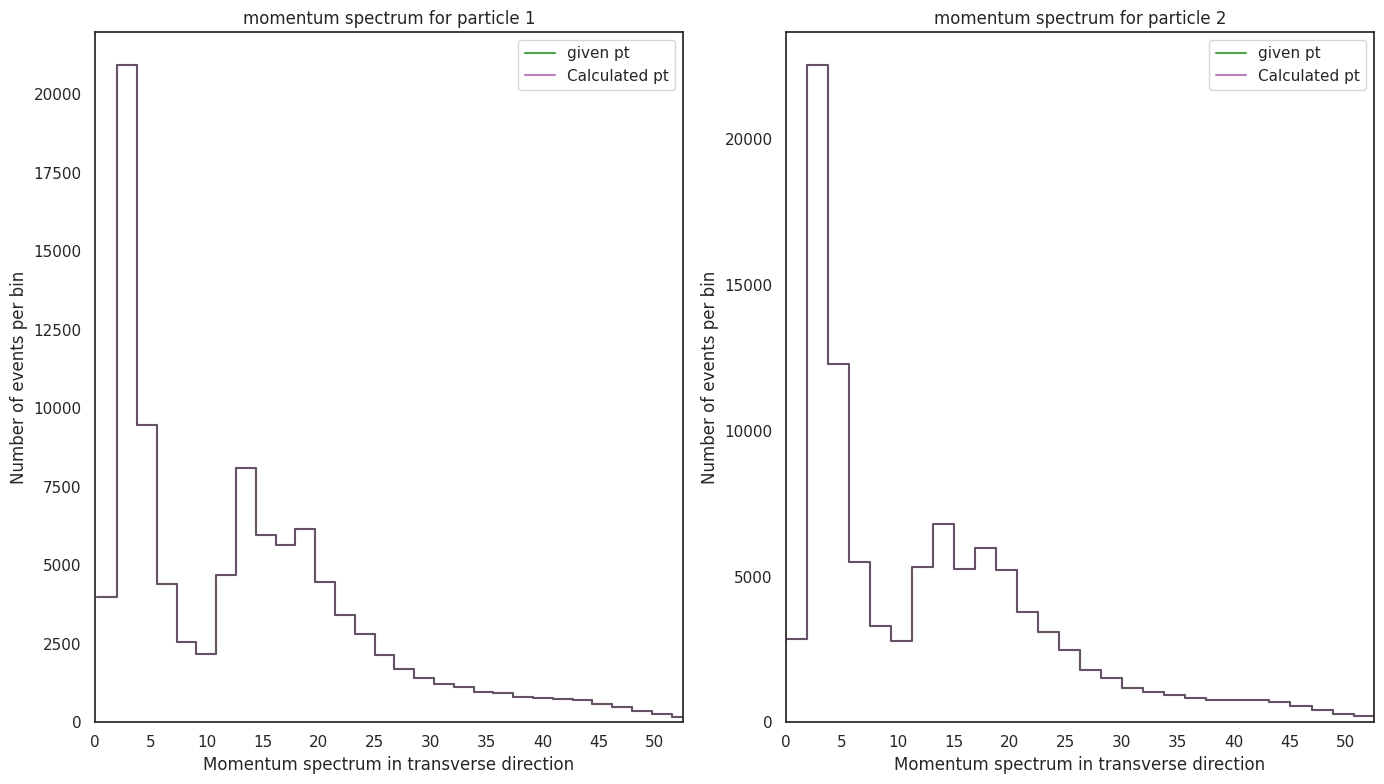

In [ ]:

plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
bins_manual=150 # manual bin selection
bins=np.histogram_bin_edges(df['pt1'], bins='fd')   # numpy auto bin selection
bin_width_array=np.diff(bins)
bin_width=bin_width_array[0]  # width of a bin
#sns.histplot(x='pt1', data=df, binwidth=bin_width,color='green', alpha=0.7, element='step', fill=False,label='given pt')
#sns.histplot(x='pt1_calculated', data=df, binwidth=bin_width,color='purple', alpha=0.5, element='step',fill=False,label='Calculated pt')

sns.histplot(x='pt1', data=df, bins=bins_manual,color='green', alpha=0.7, element='step', fill=False,label='given pt')
sns.histplot(x='pt1_calculated', data=df, bins=bins_manual,color='purple', alpha=0.5, element='step',fill=False,label='Calculated pt')
plt.title('momentum spectrum for particle 1')
plt.xlim(0,final_quantile_pt1)  # setting lower and upper limit of x-axis
plt.xticks(np.arange(0,final_quantile_pt1,5)) # setting scale fir x axis
plt.xlabel("Momentum spectrum in transverse direction")
plt.ylabel('Number of events per bin')
plt.legend()


plt.subplot(1,2,2)
bin_manual=50  # manual bin selection
bins=np.histogram_bin_edges(df['pt1'], bins='fd')   # numpy auto bin selection
sns.histplot(x='pt2', data=df, bins=bins_manual,color='green', alpha=0.7, element='step', fill=False,label='given pt')
sns.histplot(x='pt2_calculated', data=df, bins=bins_manual, color='purple', alpha=0.5, element='step',fill=False,label='Calculated pt')
plt.title('momentum spectrum for particle 2')
plt.xlim(0,final_quantile_pt1)  # setting limits for x axis
plt.xticks(np.arange(0,final_quantile_pt1,5)) # setting scale for x axis
plt.xlabel("Momentum spectrum in transverse direction")
plt.ylabel('Number of events per bin')
plt.legend()


plt.tight_layout()

plt.show()

# Longitudinal Momemtum (Pz)


In [ ]:
df=df.dropna(subset=['pz1'])

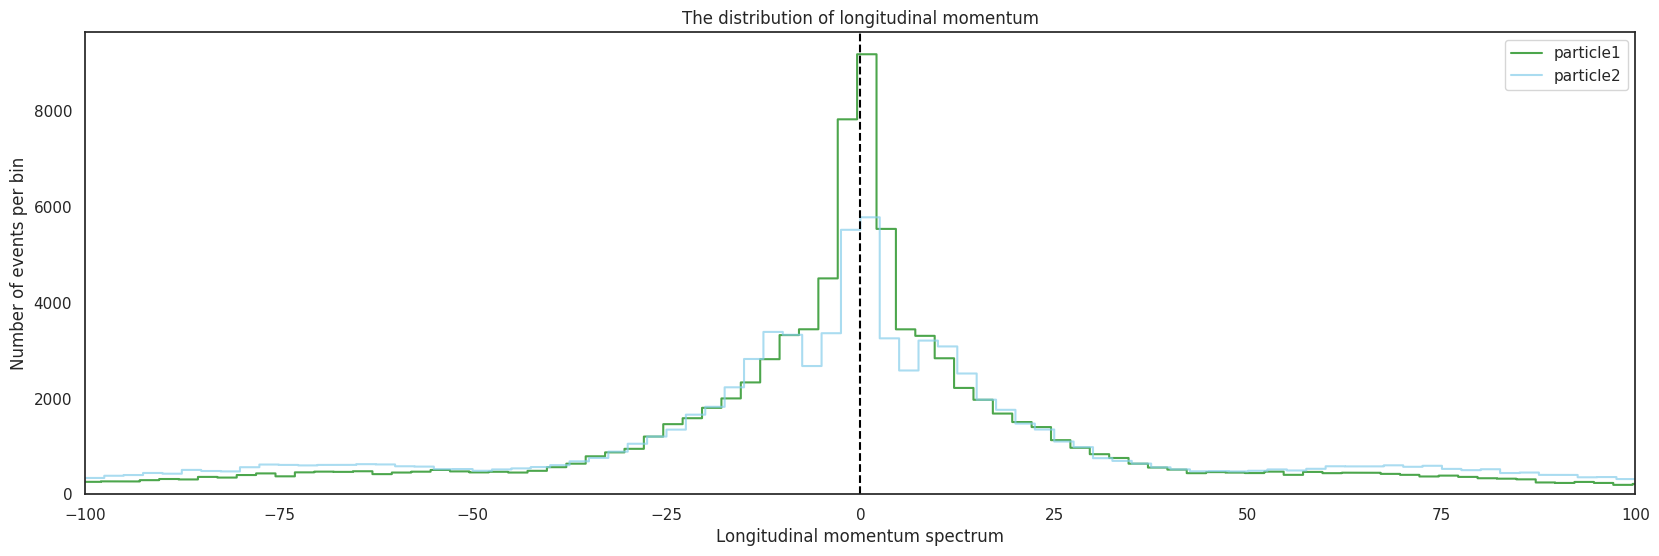

In [ ]:
# configuration fir particle 1

below_zero=df[df['pz1']<0]
below_quantile_p1=below_zero['pz1'].quantile(0.01)
final_quantile_p1=df['pz1'].quantile(0.99)

#configuration for particle 2
below_zero=df[df['pz2']<0]
below_quantile_p2=below_zero['pz2'].quantile(0.01)
final_quantile_p2=df['pz2'].quantile(0.99)


bins_manual=50  # manual bin selection
bins_auto=np.histogram_bin_edges(df['pz1'], bins='fd')   # numpy auto bin selection(determine bin edges)
bin_width_array=np.diff(bins_auto)
bin_width=bin_width_array[0]  # width of a bin
plt.figure(figsize=(20,6))
#sns.histplot(x='pz1', data=df,binwidth=bin_width,color='green', alpha=0.7, element='step', fill=False,label='particle1')
#sns.histplot(x='pz2', data=df, binwidth=bin_width, color='skyblue', alpha=0.7, element='step', fill=False,label='particle2')

sns.histplot(x='pz1', data=df,binwidth=2.5,color='green', alpha=0.7, element='step', fill=False,label='particle1')
sns.histplot(x='pz2', data=df, binwidth=2.5, color='skyblue', alpha=0.7, element='step', fill=False,label='particle2')


plt.xlim(-100,100) # setting lower and uppper limit for x axis
#plt.xticks(np.arange(-100,100,20))  # setting scale for x axis

plt.xlabel('Longitudinal momentum spectrum')
plt.ylabel('Number of events per bin')
plt.title('The distribution of longitudinal momentum')
plt.legend()
plt.axvline(x=0, color='black', linestyle='--')
plt.show()


# Rapidity (eta) and the Azimuthal Angle (phi)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Run     100000 non-null  int64  
 1   Event   100000 non-null  int64  
 2   E1      100000 non-null  float64
 3   px1     100000 non-null  float64
 4   py1     100000 non-null  float64
 5   pz1     100000 non-null  float64
 6   pt1     100000 non-null  float64
 7   eta1    100000 non-null  float64
 8   phi1    100000 non-null  float64
 9   Q1      100000 non-null  int64  
 10  E2      100000 non-null  float64
 11  px2     100000 non-null  float64
 12  py2     100000 non-null  float64
 13  pz2     100000 non-null  float64
 14  pt2     100000 non-null  float64
 15  eta2    100000 non-null  float64
 16  phi2    100000 non-null  float64
 17  Q2      100000 non-null  int64  
 18  M       99915 non-null   float64
dtypes: float64(15), int64(4)
memory usage: 14.5 MB
None


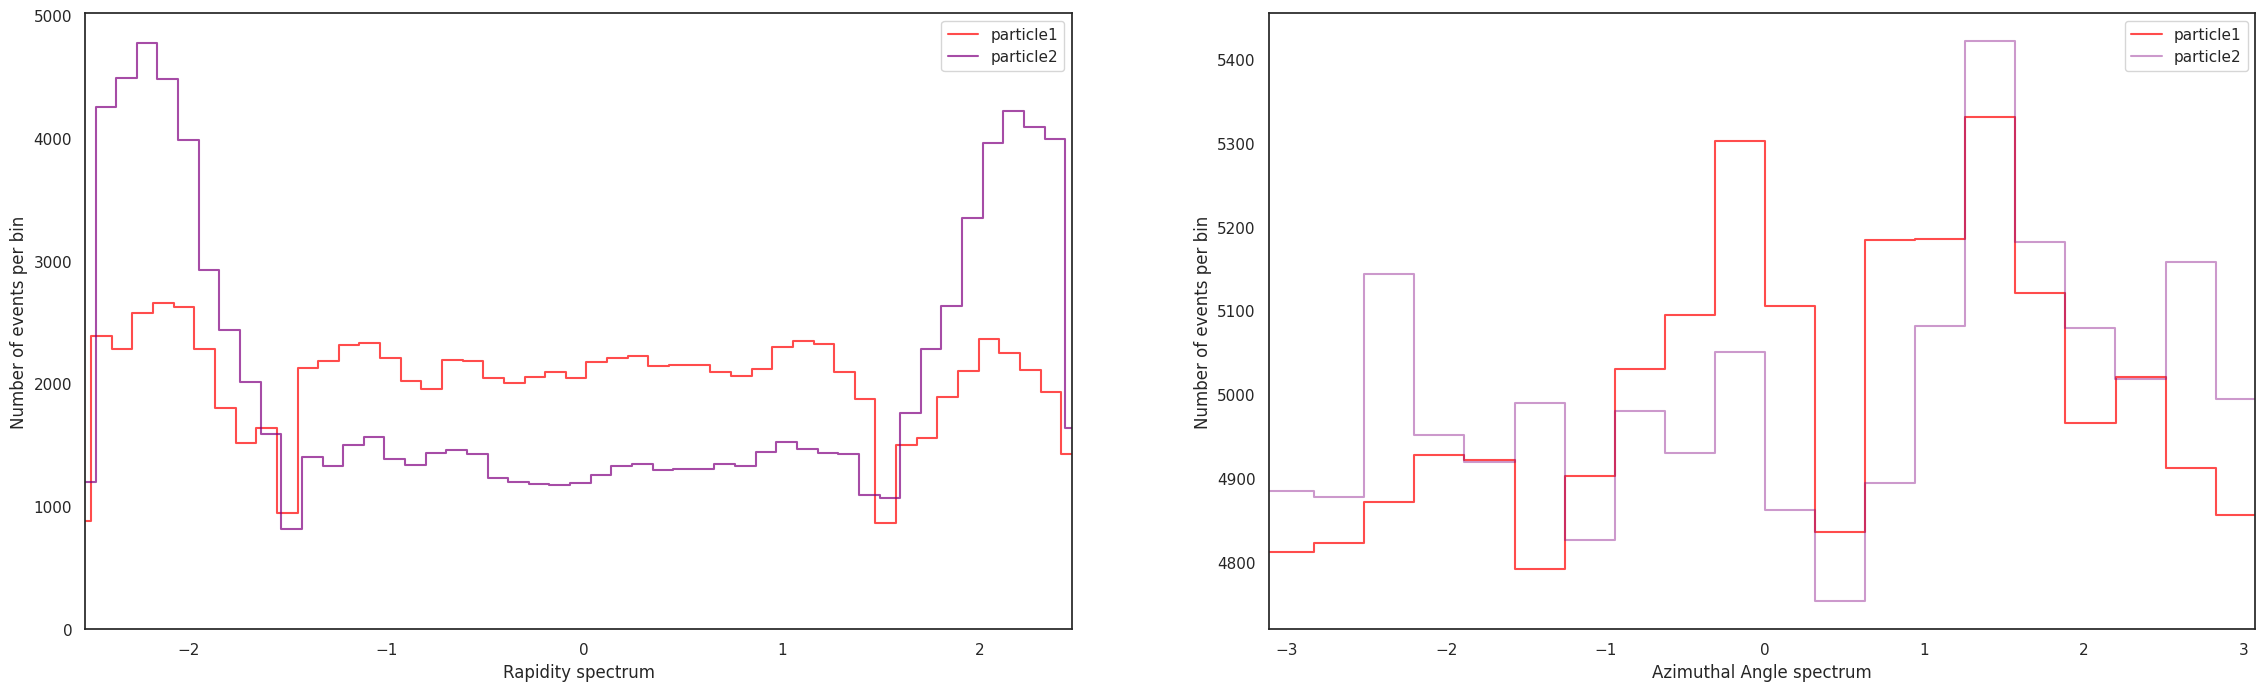

In [ ]:
'''configuration for rapidity'''

# configuration for particle 1
below_zero=df[df['eta1']<0]
below_quantile_p1=below_zero['eta1'].quantile(0.01)
final_quantile_p1=df['eta1'].quantile(0.99)

# configuration for particle 2
below_zero=df[df['eta2']<0]
below_quantile_p2=below_zero['eta2'].quantile(0.01)
final_quantile_p2=df['eta2'].quantile(0.99)

'''configuration for Azimuthal angle'''

# configuration for particle 1
below_zero=df[df['phi1']<0]
below_quantile_p1_phi1=below_zero['phi1'].quantile(0.01)
final_quantile_p1_phi1=df['phi1'].quantile(0.99)

# configuration for particle 2
below_zero=df[df['phi2']<0]
below_quantile_p2_phi2=below_zero['phi2'].quantile(0.01)
final_quantile_p2_phi2=df['phi2'].quantile(0.99)

plt.figure(figsize=(28,8))
bins_auto=np.histogram_bin_edges(df['eta1'],bins='fd')  # numpy auto bin selection
bin_width_array=np.diff(bins_auto)
bin_width=bin_width_array[0]  # width of a bin


plt.subplot(1,2,1)
sns.histplot(x='eta1',data=df,binwidth=bin_width,element='step',fill=False,alpha=0.7,color='red',label='particle1')
sns.histplot(x='eta2',data=df,binwidth=bin_width,element='step',fill=False,alpha=0.7,color='purple',label='particle2')

lower=min(below_quantile_p1,below_quantile_p2)
upper=max(final_quantile_p1,final_quantile_p2)
plt.xlim(lower,upper) # setting lower and upper limit for x-axis

plt.xlabel('Rapidity spectrum')
plt.ylabel('Number of events per bin')
plt.legend()

plt.subplot(1,2,2)

bins_auto=np.histogram_bin_edges(df['eta1'],bins='fd')  # numpy auto bin selection
bin_width_array=np.diff(bins_auto)
bin_width=bin_width_array[0]  # width of a bin

sns.histplot(x='phi1',data=df,bins=20,element='step',fill=False,alpha=0.7,color='red',label='particle1')
sns.histplot(x='phi2',data=df,bins=20,element='step',fill=False,alpha=0.4,color='purple',label='particle2')
lower=min(below_quantile_p1_phi1,below_quantile_p2_phi2)
upper=max(final_quantile_p1_phi1,final_quantile_p2_phi2)
plt.xlim(lower,upper) # setting lower and upper limit for x-axis

plt.xlabel('Azimuthal Angle spectrum')
plt.ylabel('Number of events per bin')

plt.legend()
plt.show()


# Invariant Mass

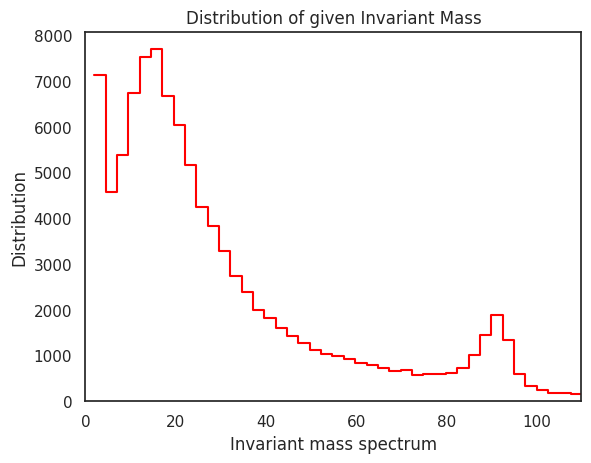

In [ ]:
df=df.dropna(subset=['M'])

df['p_net']=np.sqrt(np.square(df['px1']+df['px2'])+np.square(df['py1']+df['py2'])+np.square(df['pz1']+df['pz2']))
df['E_net']=df['E1']+df['E2']
df['M_calculated']=np.sqrt(np.square(df['E_net'])-np.square(df['p_net']))

#plt.figure(figsize=(14,10))

final_quantile= df['M'].quantile(0.9999)
bins_auto=np.histogram_bin_edges(df['M'],bins='fd')  # numpy auto bin selection
bin_width_array=np.diff(bins_auto)
bin_width=bin_width_array[0]  # width of a bin


#sns.histplot(x='M',data=df,element='step',fill=False,binwidth=bin_width,color='red',)

sns.histplot(x='M',data=df,element='step',fill=False,binwidth=2.5,color='red',)

plt.xlim(0,final_quantile)  # setting limits for x axis
plt.xlabel('Invariant mass spectrum')
plt.ylabel('Distribution')
plt.title('Distribution of given Invariant Mass')
plt.show()

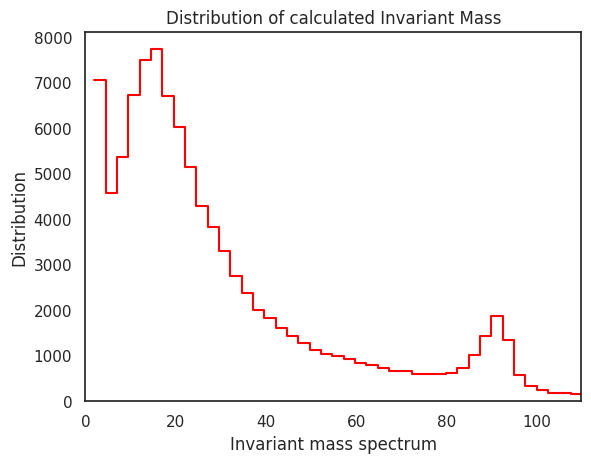

In [ ]:



final_quantile_cal= df['M_calculated'].quantile(0.9999)

bins_auto=np.histogram_bin_edges(df['M_calculated'],bins='fd')  # numpy auto bin selection
bin_width_array=np.diff(bins_auto)
bin_width=bin_width_array[0]  # width of a bin

sns.histplot(x='M_calculated',data=df,element='step',fill=False,binwidth=2.5,color='red',)

plt.xlim(0,final_quantile_cal)  # setting limits for x axis
plt.xlabel('Invariant mass spectrum')
plt.ylabel('Distribution')
plt.title('Distribution of calculated Invariant Mass')
plt.show()





# Initiating the model building

## Importing all necessary libraeries for model training and evaluation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score


# Data CLeaning and transformation


In [ ]:
df=df.dropna(subset=['M'])
df['pt1_squared']=df['pt1']**2
df['pt2_squared']=df['pt2']**2



# splitting dataset into training and testing elements

In [ ]:
train_data,test_data=train_test_split(df,test_size=0.2,random_state=13)


# Data preprocessing and some feature engineering

## Creating input and target frames

In [ ]:
#input and target cols for particle 1
input_cols_p1=['px1','py1']
target_cols_p1='pt1_squared'
#input and target cols for particle 2
input_cols_p2=['px2','py2']
target_cols_p2='pt2_squared'

# training input and target data for particle 1
train_input_p1=train_data[input_cols_p1]
train_target_p1=train_data[target_cols_p1]

test_input_p1=test_data[input_cols_p1]
test_target_p1=test_data[target_cols_p1]

# training input and taregt data for particle 2

train_input_p2=train_data[input_cols_p2]
train_target_p2=train_data[target_cols_p2]

test_input_p2=test_data[input_cols_p2]
test_target_p2=test_data[target_cols_p2]





## scaling the input columns

In [ ]:
scaler=MinMaxScaler() # creating the sclaer object
scaler.fit(train_input_p1)  # fitting data to particle 1
train_input_p1[input_cols_p1]=scaler.transform(train_input_p1[input_cols_p1])  # scaling the input data

scaler.fit(train_input_p2)  # fitting data to particle 2
train_input_p2[input_cols_p2]=scaler.transform(train_input_p2[input_cols_p2])  # scaling the input data

# Initiating Data modelling for particle 1

## Linear/Polynomial Regressor

## configuration for Polynomial Regressor

In [ ]:
#input and target cols for particle 1
input_cols_p1=['px1','py1']
target_cols_p1='pt1_squared'
#input and target cols for particle 2
input_cols_p2=['px2','py2']
target_cols_p2='pt2_squared'

# training input and target data for particle 1
train_input_p1=train_data[input_cols_p1]
train_target_p1=train_data[target_cols_p1]

test_input_p1=test_data[input_cols_p1]
test_target_p1=test_data[target_cols_p1]

# training input and taregt data for particle 2

train_input_p2=train_data[input_cols_p2]
train_target_p2=train_data[target_cols_p2]

test_input_p2=test_data[input_cols_p2]
test_target_p2=test_data[target_cols_p2]





In [ ]:
model_pr=LinearRegression()

poly=PolynomialFeatures(degree=2,include_bias=False)


train_input_p1_trans=poly.fit_transform(train_input_p1)
model_pr.fit(train_input_p1_trans,train_target_p1)


predictions_model=model_pr.predict(train_input_p1_trans)  # model predictions



score_model=r2_score(train_target_p1,predictions_model)



# evaluating on test set
test_predictions=model_pr.predict(poly.fit_transform(test_input_p1))
score_test=r2_score(test_target_p1,test_predictions)

pred_series=pd.Series(predictions_model,name='predictions')
df

train_data['pt1_squared_modelled']=pred_series

'''Modelling for particle 2 aka  pt2'''


train_input_p2_trans=poly.fit_transform(train_input_p2)
model_pr.fit(train_input_p2_trans,train_target_p2)


predictions2_model=model_pr.predict(train_input_p2_trans)  # model predictions

pred2_series=pd.Series(predictions2_model,name='predictions')
df

train_data['pt2_squared_modelled']=pred2_series






# Plotting modelled vs original parameters

## Particle 1


In [ ]:
'''train_data['pt1_modelled=']=train_data['pt1_squared_modelled']**0.5
train_data['pt2_modelled']=train_data['pt2_squared_modelled']**0.5

print(train_data.columns)

print(train_data.describe())'''
print(train_data.columns)


Index(['Run', 'Event', 'E1', 'px1', 'py1', 'pz1', 'pt1', 'eta1', 'phi1', 'Q1',
       'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2', 'Q2', 'M',
       'pt1_calculated', 'pt2_calculated', 'pt1_squared', 'pt2_squared',
       'pt1_modelled', 'pt2_modelled', 'pt1_squared_modelled',
       'pt2_squared_modelled', 'pt1_modelled='],
      dtype='object')


ValueError: autodetected range of [nan, nan] is not finite

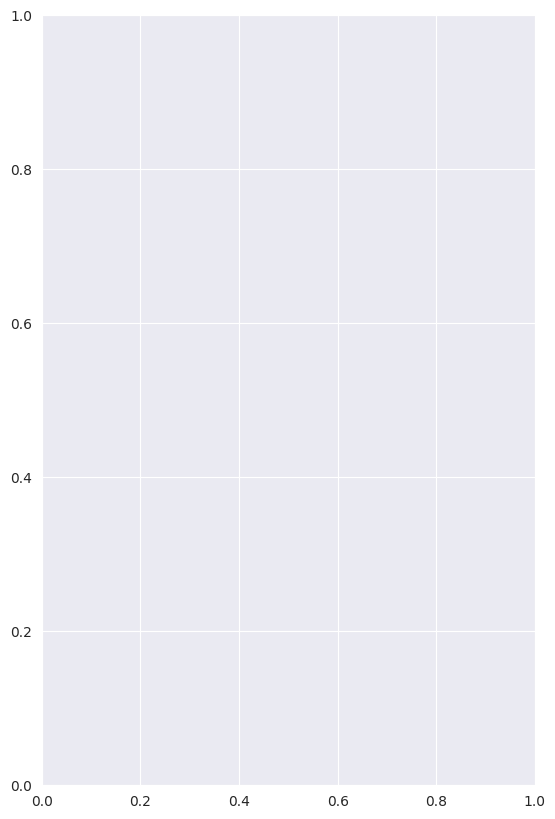

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,10))
plt.subplot(1,2,1)
bins=np.histogram_bin_edges(train_data['pt1_modelled'], bins='fd')   # numpy auto bin selection
bin_width_array=np.diff(bins)
bin_width=bin_width_array[0]  # width of a bin
sns.histplot(x='pt1_modelled',data=train_data,binwidth=bin_width,element='step',fill=False,color='red',alpha=0.7,label='original pt')
plt.subplot(1,2,2)
bins=np.histogram_bin_edges(train_data['pt1'], bins='fd')   # numpy auto bin selection
bin_width_array=np.diff(bins)
bin_width=bin_width_array[0]  # width of a bin
sns.histplot(x='pt1',data=train_data,binwidth=bin_width,element='step',fill=False,color='red',alpha=0.7,label='modelled pt')
plt.legend()
plt.show()

In [ ]:
feature_names = poly.get_feature_names_out(input_features=input_cols_p1)
#print(score_model)  # training evaluation
print(feature_names)
print(model_pr.coef_)


['px1' 'py1' 'px1^2' 'px1 py1' 'py1^2']
[ 9.28633844e-07 -3.38069286e-08  9.99999924e-01 -5.25691357e-07
  1.00000039e+00]


# Random Forest Regressor

## Configuration

In [ ]:
'''We are modelling pt against px and py'''



#input and target cols for particle 1
input_cols_p1=['px1','py1']
target_cols_p1='pt1'
#input and target cols for particle 2
input_cols_p2=['px2','py2']
target_cols_p2='pt2'

# training input and target data for particle 1
train_input_p1=train_data[input_cols_p1]
train_target_p1=train_data[target_cols_p1]

test_input_p1=test_data[input_cols_p1]
test_target_p1=test_data[target_cols_p1]

# training input and taregt data for particle 2

train_input_p2=train_data[input_cols_p2]
train_target_p2=train_data[target_cols_p2]

test_input_p2=test_data[input_cols_p2]
test_target_p2=test_data[target_cols_p2]


In [ ]:
model_rfr=RandomForestRegressor()

# for particle 1

model_rfr.fit(train_input_p1,train_target_p1)

predictions_p1=model_rfr.predict(train_input_p1)
score_rfr1=r2_score(train_target_p1,predictions_p1)

# for particle 2
model_rfr.fit(train_input_p2,train_target_p2)

predictions_p2=model_rfr.predict(train_input_p2)
score_rf2r=r2_score(train_target_p2,predictions_p2)





In [ ]:
print(score_rfr1,score_rf2r,sep='\n')

0.9995607146137657
0.9994269161657238


In [ ]:
train_data['pt1_modeled']=predictions_p1
train_data['pt2_modeled']=predictions_p2

# Using cross validation for model selection

## Cross val score for Polynomial regressor

In [ ]:
val_score=cross_val_score(model_pr,train_input_p1_trans,train_target_p1,cv=10)
print(val_score.mean())
print(val_score.std())

NameError: name 'model_pr' is not defined

## For random Forest Regressor

In [ ]:
val_score=cross_val_score(model_rfr,train_input_p2,train_target_p2,cv=10)
print(val_score.mean())
print(val_score.std())

0.9955162230974051
0.0049612700562486215


# Plotting graphs for original vs Modelled

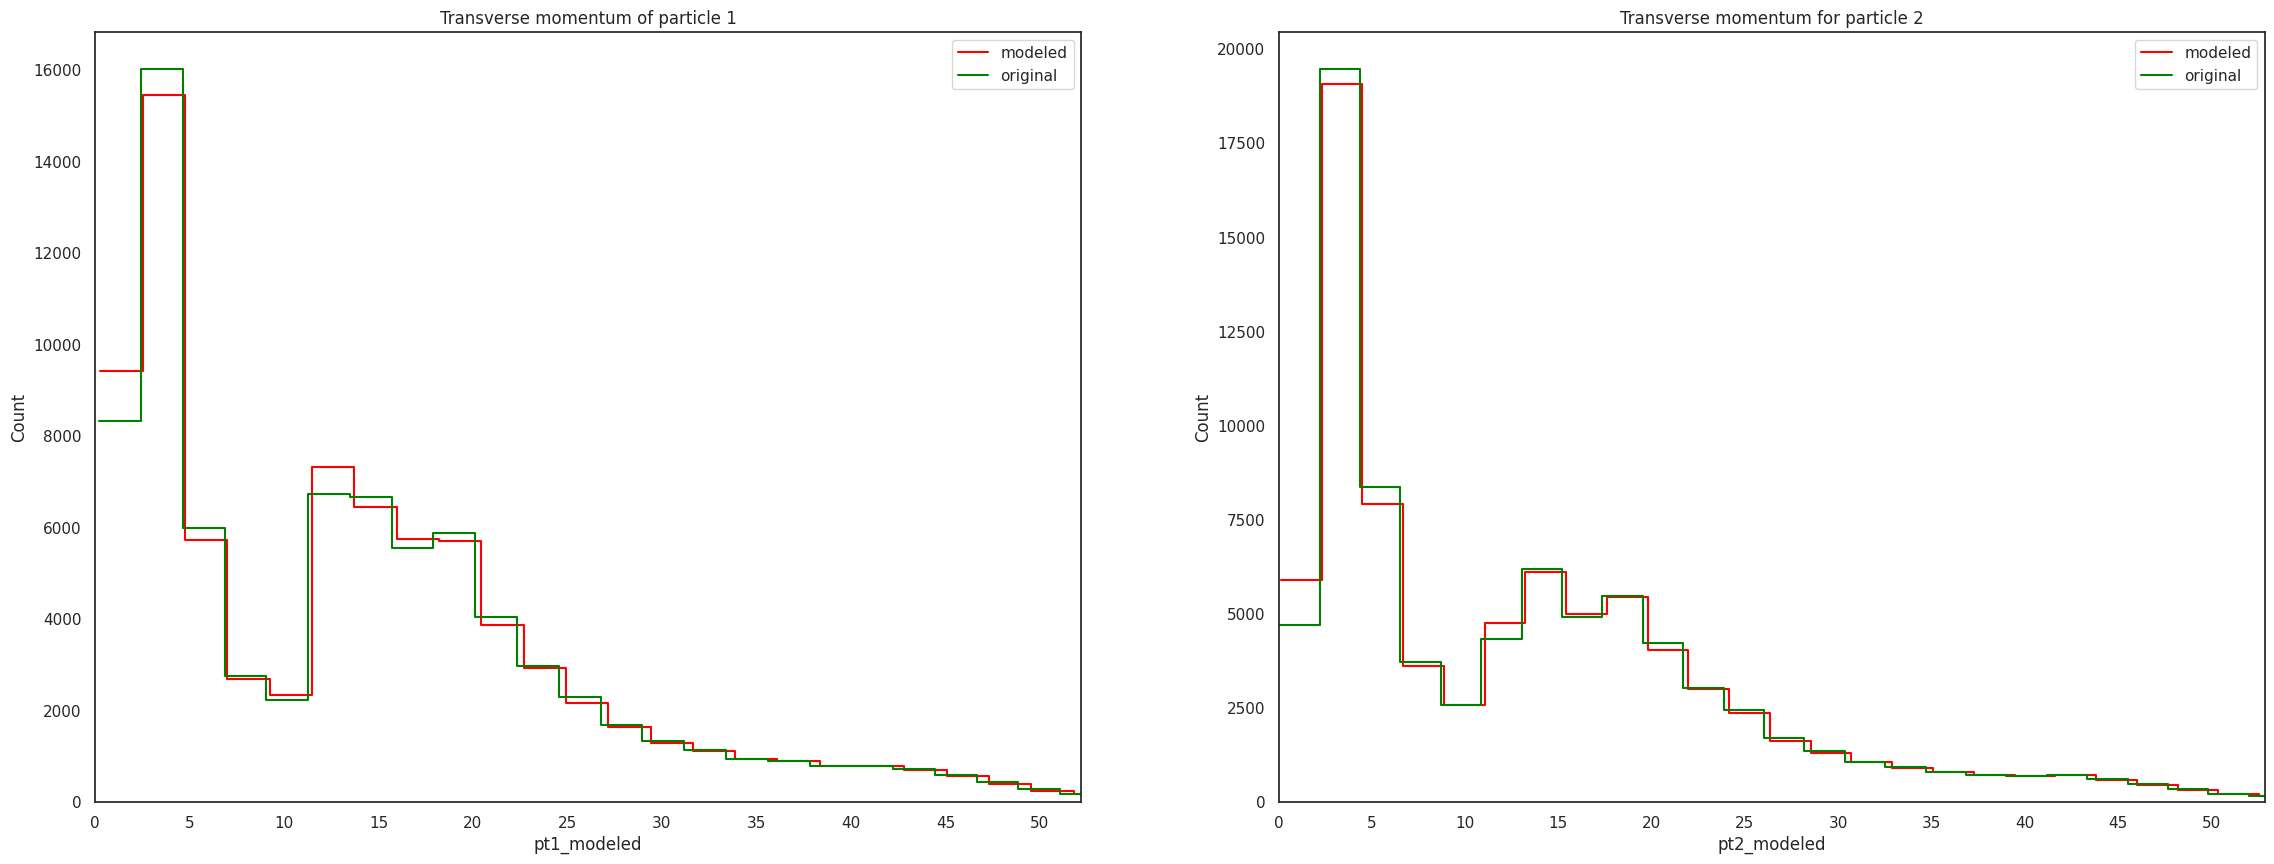

In [ ]:
plt.figure(figsize=(28,10))
plt.subplot(1,2,1)
final_quantile=train_data['pt1_modeled'].quantile(0.99)
bins=np.histogram_bin_edges(train_data['pt1_modeled'], bins='fd')   # numpy auto bins
bin_width_array=np.diff(bins)
bin_width=bin_width_array[0]  # width of a bin

sns.histplot(x='pt1_modeled',data=train_data,element='step',bins=100,fill=False,color='red',label='modeled')
sns.histplot(x='pt1',data=train_data,element='step',bins=120,fill=False,color='green',label='original')
plt.xlim(0,final_quantile)
plt.xticks(np.arange(0,final_quantile,5))
plt.legend()
plt.title('Transverse momentum of particle 1')

plt.subplot(1,2,2)
final_quantile=train_data['pt2_modeled'].quantile(0.99)
bins=np.histogram_bin_edges(train_data['pt2_modeled'], bins='fd')   # numpy auto bins
bin_width_array=np.diff(bins)
bin_width=bin_width_array[0]  # width of a bin

sns.histplot(x='pt2_modeled',data=train_data,element='step',bins=100,fill=False,color='red',label='modeled')
sns.histplot(x='pt2',data=train_data,element='step',bins=130,fill=False,color='green',label='original')
plt.xlim(0,final_quantile)
plt.xticks(np.arange(0,final_quantile,5))
plt.legend()
plt.title('Transverse momentum for particle 2')


plt.show()


In [ ]:
|